# Analyze, Transform, and Shift Data

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load dataset from csv file
df = pd.read_csv("../DATA/cars_and_careers.CSV")
df.head()

,Name,Occupation,Age,Car
0,John,ENGINEER,32,Toyota Camry
1,Emily,TEACHER,28,Honda Civic
2,Michael,DOCTOR,45,Ford Mustang
3,Emma,LAWYER,37,BMW 3 Series
4,David,ARTIST,41,Mercedes-Benz C-Class


In [3]:
# Details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        20 non-null     object
 1   Occupation  20 non-null     object
 2   Age         20 non-null     int64 
 3   Car         20 non-null     object
dtypes: int64(1), object(3)
memory usage: 772.0+ bytes


In [4]:
# Mean age
mean_age = df.describe().loc['mean','Age']
print(f"The mean age is {mean_age}")

The mean age is 34.75


In [5]:
# Car column names into lower case

df['Car'] = df['Car'].str.lower()
df.head() 

,Name,Occupation,Age,Car
0,John,ENGINEER,32,toyota camry
1,Emily,TEACHER,28,honda civic
2,Michael,DOCTOR,45,ford mustang
3,Emma,LAWYER,37,bmw 3 series
4,David,ARTIST,41,mercedes-benz c-class


In [6]:
# OR
df['Car'] = df['Car'].transform(lambda x: x.lower())
df.head()


,Name,Occupation,Age,Car
0,John,ENGINEER,32,toyota camry
1,Emily,TEACHER,28,honda civic
2,Michael,DOCTOR,45,ford mustang
3,Emma,LAWYER,37,bmw 3 series
4,David,ARTIST,41,mercedes-benz c-class


In [7]:
# Shifting data row
df = df.shift(periods=1,axis=0)

# Insert data list as first row
lis = ["Casy","Dancer", 31, "Tesla"]
df.iloc[0] = lis
df.head()

,Name,Occupation,Age,Car
0,Casy,Dancer,31.0,Tesla
1,John,ENGINEER,32.0,toyota camry
2,Emily,TEACHER,28.0,honda civic
3,Michael,DOCTOR,45.0,ford mustang
4,Emma,LAWYER,37.0,bmw 3 series


In [8]:
# Is Ben in dataset
ben_present = not (df['Name'].str.find('Ben').sum() == -len(df))
ben_present

True

In [9]:
# Index of Emily in dataset
emily_index = df.index[df['Name']=='Emily'].tolist()

# Emily's car
emily_car = df.loc[emily_index,'Car']

# Emily's occupation
emily_occupation = df.loc[emily_index,'Occupation']

print(f"Emily's car is {str(emily_car.tolist()[0])}")
print(f"Emily's occupation is {str(emily_occupation.tolist()[0])}")

Emily's car is honda civic
Emily's occupation is TEACHER


In [10]:
# Index of oldest person
oldest_person_index = df['Age'].idxmax()

# Oldest person's car
car_oldest_person = df.loc[oldest_person_index,'Car'] 
print(f"The oldest person drives a {car_oldest_person}")

The oldest person drives a ford mustang


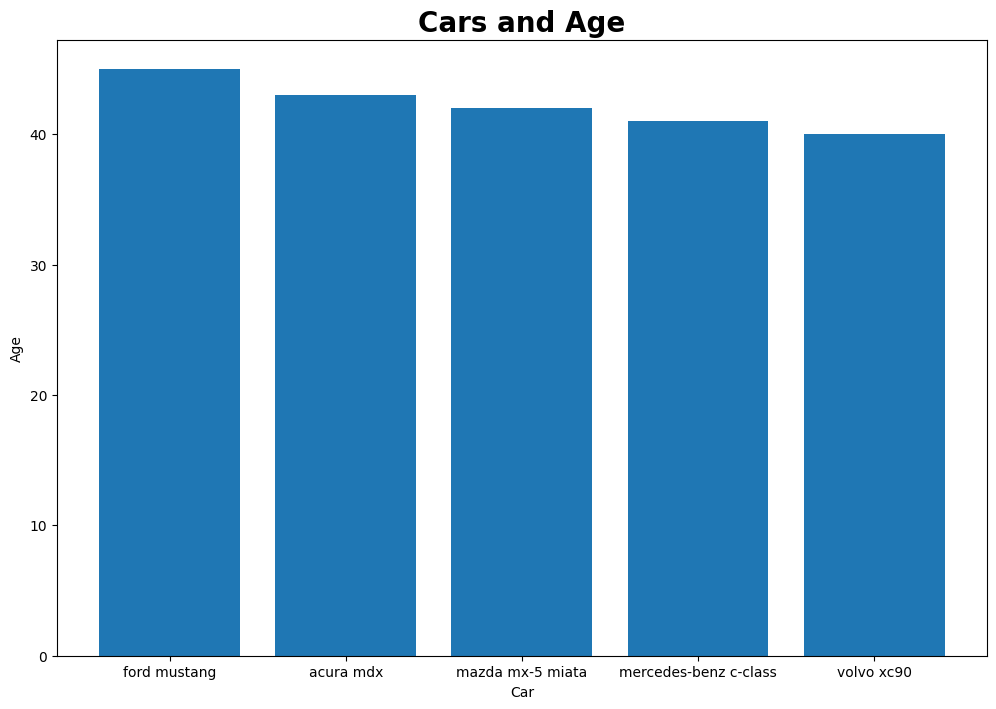

In [11]:
# Sort df by age
df_sorted = df.sort_values(by='Age',ascending=False).head()

# Fetch car 
car = df_sorted["Car"]
# Fetch age
age = df_sorted["Age"]

# Barplot of sorted persons
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(x=car, height=age)
ax.set(xlabel='Car', ylabel='Age')
plt.title(label="Cars and Age",
          fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

In [12]:
# Create dummy variables
df_modified = pd.get_dummies(df, columns=['Name','Occupation','Car'])
df_modified.head()

,Age,Name_Alexander,Name_Amelia,Name_Andrew,Name_Ava,Name_Benjamin,Name_Casy,Name_Charlotte,Name_Daniel,Name_David,...,Car_kia soul,Car_lexus rx,Car_mazda mx-5 miata,Car_mercedes-benz c-class,Car_nissan sentra,Car_subaru outback,Car_tesla model s,Car_toyota camry,Car_volkswagen golf,Car_volvo xc90
0,31.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,32.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Number of columns
df_modified.shape[1]

61

In [14]:
# Initialize label encoder
cars = LabelEncoder()
names = LabelEncoder()
occupation = LabelEncoder()

# Fit and train label encoder to data
df['Car'] = cars.fit_transform(df['Car'])
df['Name'] = names.fit_transform(df['Name'])
df['Occupation'] = occupation.fit_transform(df['Occupation'])
df.head()

,Name,Occupation,Age,Car
0,5,7,31.0,0
1,13,8,32.0,17
2,9,18,28.0,7
3,16,6,45.0,5
4,10,11,37.0,3
